In [1]:
#verification that each region yileds the equilibrium suggested by theory
%load_ext autoreload
%autoreload 2
from utils.imports import *
from utils.single_stage import get_xi_dist, get_example
from utils.infinite_horizon import *
from dsGameSolver.gameSolver import dsSolve

def get_computed_equilibrium(payoff_matrices,transition_prob_matrices,discount_factors,pa_arr,pb_arr,show_progress=True,plot_path=True):
    equilibrium = dsSolve(payoff_matrices,transition_prob_matrices,discount_factors,show_progress,plot_path)
    eq_indices1 = np.argmax(equilibrium['strategies'][0],axis=1)
    temp1 = [pa_arr[eq_indices1[0]],pb_arr[eq_indices1[1]],equilibrium['stateValues'][0][0],equilibrium['stateValues'][0][1]]
    temp1a = ['paa','pba','vaa','vba']
    result1 = {temp1a[i]:np.round(x,3) for i,x in enumerate(temp1)}
    eq_indices2 = np.argmax(equilibrium['strategies'][1],axis=1)
    temp2 = [pa_arr[eq_indices2[0]],pb_arr[eq_indices2[1]],equilibrium['stateValues'][1][0],equilibrium['stateValues'][1][1]]
    temp2a = ['pab','pbb','vab','vbb']
    result2 = {temp2a[i]:np.round(x,3) for i,x in enumerate(temp2)}
    return result1,result2

In [2]:
ca    = 1
cb    = 0.2
la    = 3
lb    = 4
maxpx = ca+5
npts  = 20
deltaf = 0.001
dist  = 'uniform'
_,F,f    = get_xi_dist(dist)

region=3
ca,cb,la,lb,paa_sst,pba_sst,pbb_sst,pab_sst = get_example(region)
result_ssa = {'paa_sst':paa_sst,'pba_sst':pba_sst}
result_ssb = {'pab_sst':pab_sst,'pbb_sst':pbb_sst}

vaao_t,vabo_t,vbbo_t,vbao_t,paa_t,pab_t,pbb_t,pba_t,constr1,constr2 = get_theoretical_px_obj(ca,cb,la,lb,F,f,deltaf)
result1_t = {'paa':paa_t,'pba':pba_t,'vaa':vaao_t,'vba':vbao_t}
result2_t = {'pab':pab_t,'pbb':pbb_t,'vab':vabo_t,'vbb':vbbo_t}
result1_t = {x:np.round(y,3) for x,y in result1_t.items()}
result2_t = {x:np.round(y,3) for x,y in result2_t.items()}

In [3]:
#data for solver: payoff matrices
pa_arr,pb_arr,obja_state_a,objb_state_a,\
    constraint_state_a = get_payoff_matrices_state_a(ca,cb,maxpx,npts,dist,la)
_,_,obja_state_b,objb_state_b,\
    constraint_state_b = get_payoff_matrices_state_b(ca,cb,maxpx,npts,dist,lb)
payoff_matrices = [ ## s = \alpha
                    np.array([obja_state_a,objb_state_a]), 
                    ## s = \beta
                    np.array([obja_state_b,objb_state_b])]

transition_prob_matrices = get_transition_prob_matrices(ca,cb,maxpx,npts,dist,la,lb)

Dynamic stochastic game with 2 states, 2 players and 80 actions, in total 800 action profiles.
Initial value for homotopy continuation successfully found.
Start homotopy continuation
Step 84:   t = 5446.53,   s = 7533.39,   ds = 1000.00   
Final Result:   max|y-y_|/ds = 0.0E+00,   max|H| = 6.4E-08
Time elapsed = 0:00:01
End homotopy continuation


/Users/theja/theja/research/research_key/aris20/code/dsGameSolver/homCont.py:58: RuntimeWarning: overflow encountered in exp
  self.y = np.exp(self.y)


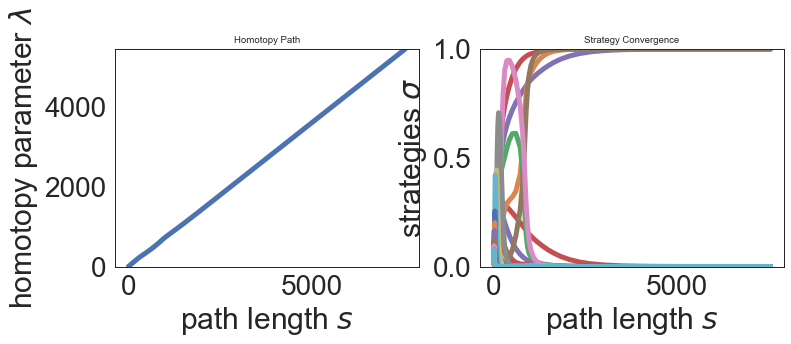

{'paa': 2.053, 'pba': 0.947, 'vaa': 0.471, 'vba': 0.525}
{'paa': 2.0, 'pba': 0.999, 'vaa': 0.5, 'vba': 0.5}
{'paa_sst': 1.98, 'pba_sst': 0.99}
{'pab': 1.263, 'pbb': 1.579, 'vab': 0.042, 'vbb': 1.331}
{'pab': 1.332, 'pbb': 1.666, 'vab': 0.055, 'vbb': 1.39}
{'pab_sst': 1.32, 'pbb_sst': 1.65}


In [4]:
result1_c,result2_c = get_computed_equilibrium(payoff_matrices,transition_prob_matrices,deltaf,
                             pa_arr,pb_arr,show_progress=True,plot_path=True)
print(result1_c)
print(result1_t)
print(result_ssa)
print(result2_c)
print(result2_t)
print(result_ssb)